In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv("/content/drive/My Drive/Collab/Sales_clustering/KAG_conversion_data.csv")
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


1.) ad_id: an unique ID for each ad.

2.) xyzcampaignid: an ID associated with each ad campaign of XYZ company.

3.) fbcampaignid: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whim the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

In [ ]:
data.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [38]:
data.shape

(1143, 11)

In [40]:
data.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [41]:
data["age"].value_counts()

30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64

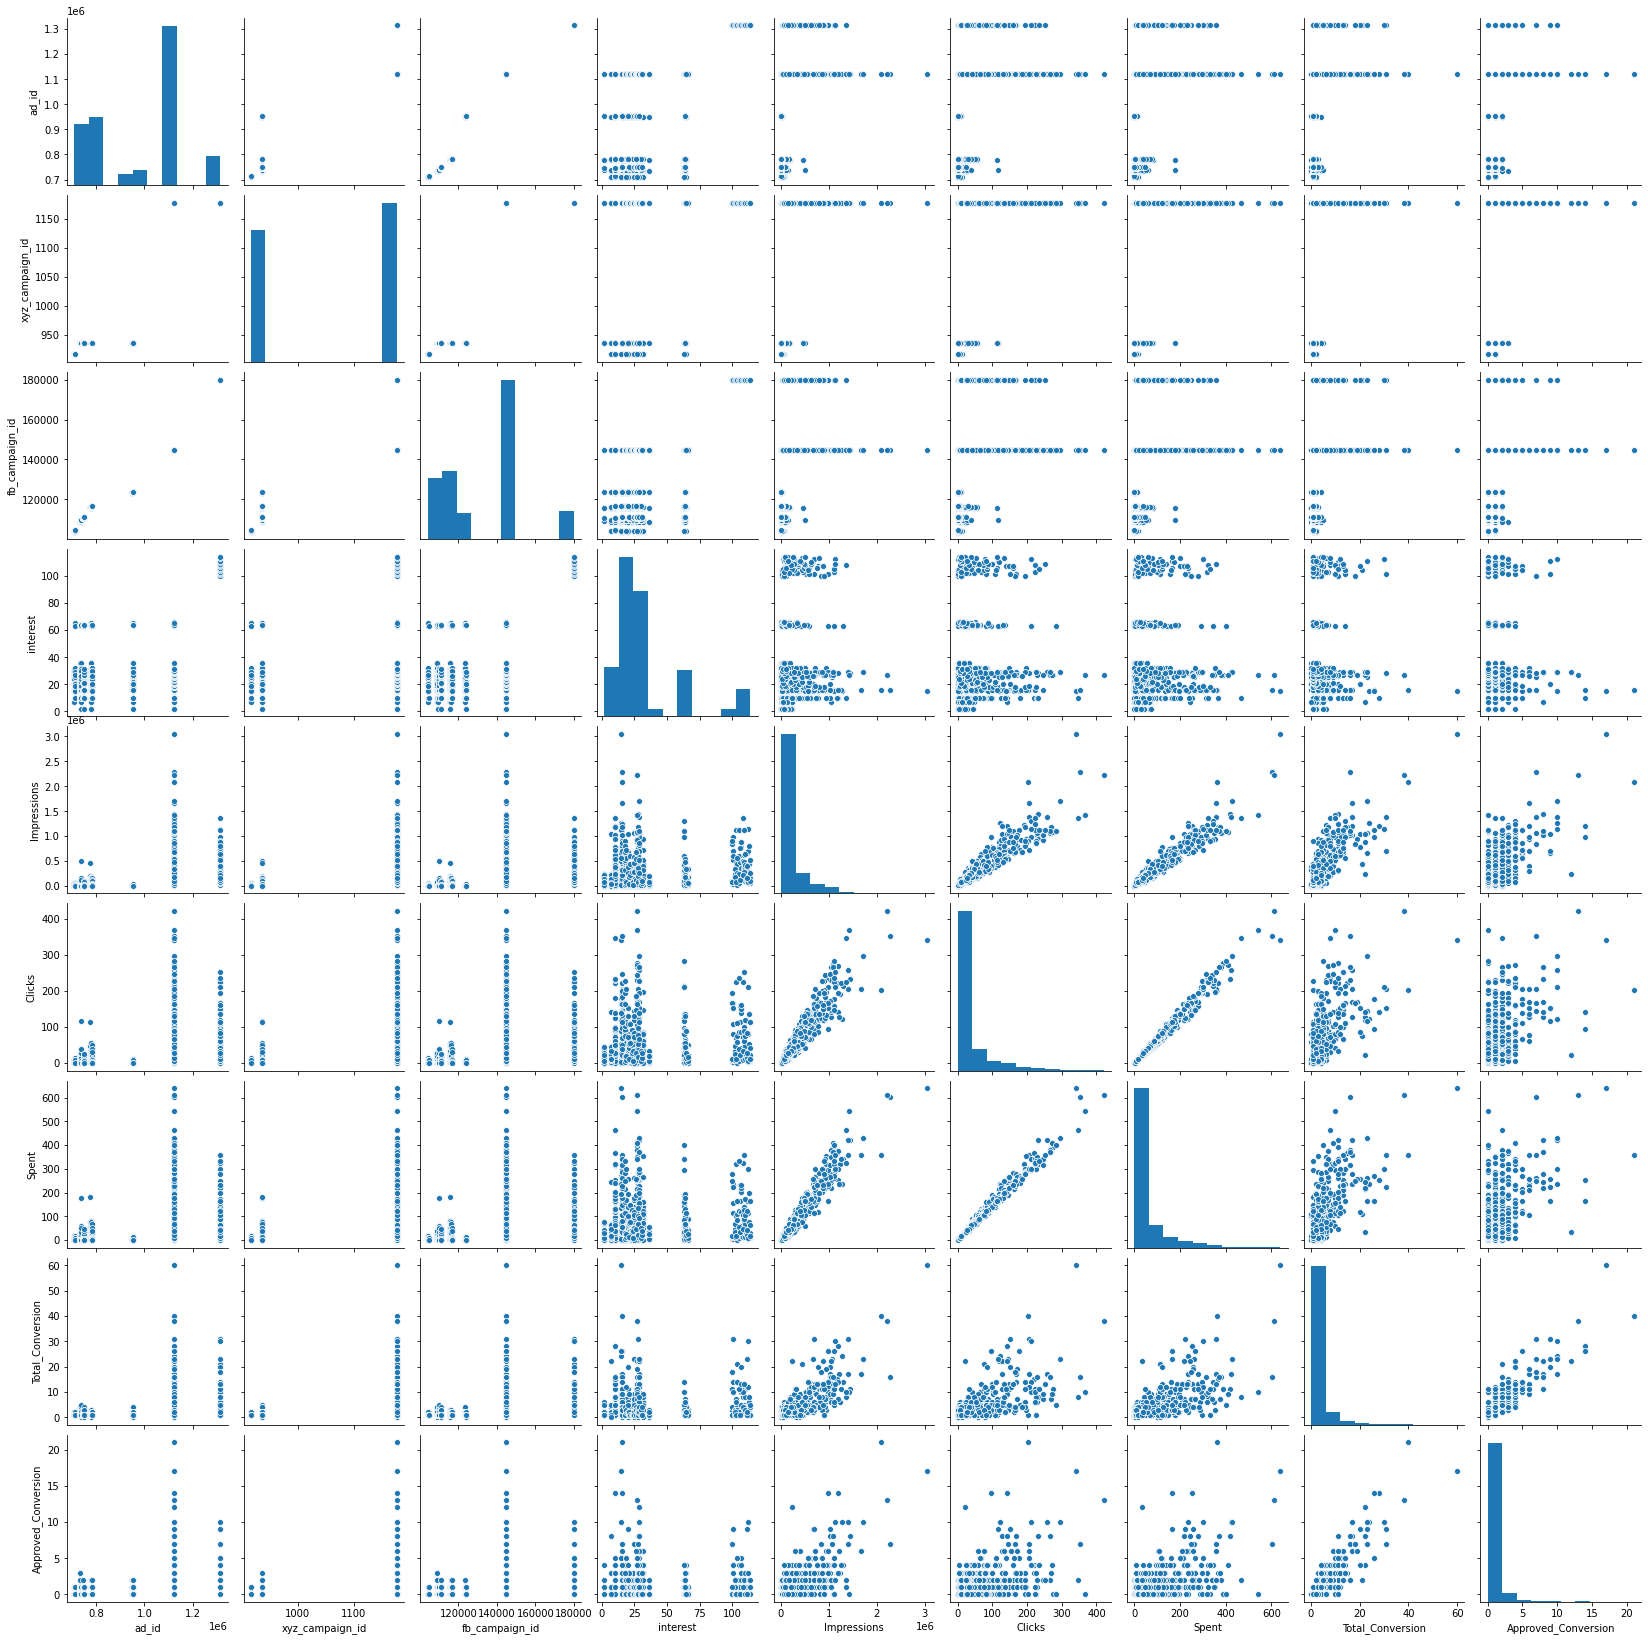

In [87]:
sns.pairplot(data =data)

In [ ]:
data["Total_Conversion"].value_counts()

1     666
2     162
3      78
4      61
5      41
6      22
7      16
11     13
8      13
13      9
0       8
10      8
9       7
22      4
17      4
16      4
14      4
12      4
23      3
26      2
31      2
20      2
60      1
40      1
18      1
19      1
21      1
24      1
28      1
30      1
38      1
15      1
Name: Total_Conversion, dtype: int64

In [ ]:
data["Approved_Conversion"].value_counts()

0     559
1     403
2      86
3      35
4      24
6       7
5       7
8       5
10      4
7       4
9       3
14      2
21      1
17      1
13      1
12      1
Name: Approved_Conversion, dtype: int64

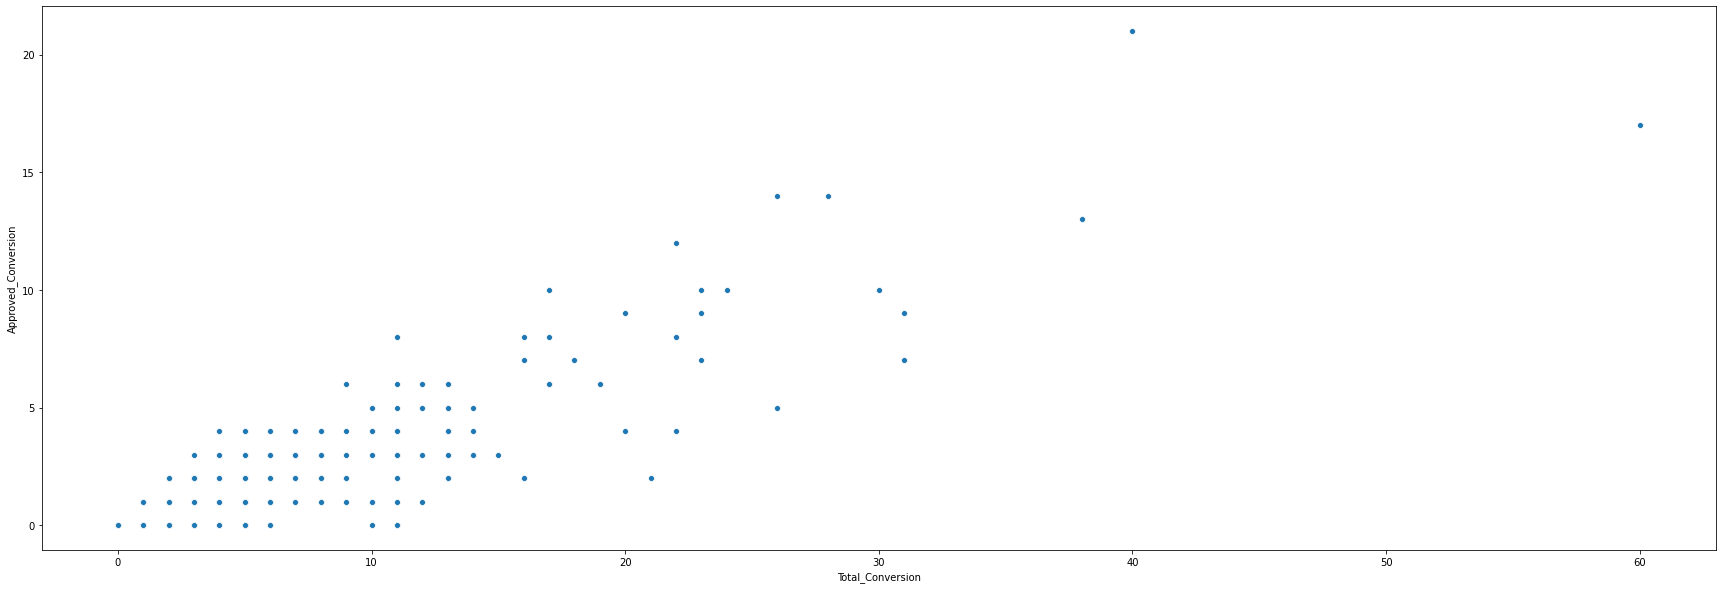

In [ ]:
plt.figure(figsize = ((30,10)))
sns.scatterplot(x = "Total_Conversion", y = "Approved_Conversion" , data = data )

In [ ]:
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [72]:
x = data.iloc[:,9:11].values

In [73]:
x

array([[2, 1],
       [2, 0],
       [1, 0],
       ...,
       [2, 0],
       [8, 2],
       [5, 2]])

KMeans Clustering 

In [74]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i , init = "k-means++" , max_iter = 300, n_init = 10 )
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    # inertia bcoz of wcss 

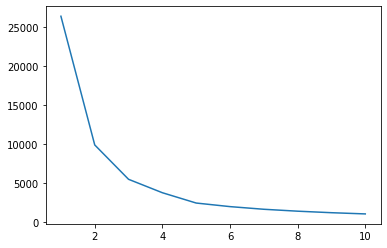

In [75]:
plt.plot(range(1,11),wcss)

In [76]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x)

In [77]:
y_kmeans

array([0, 0, 0, ..., 0, 1, 0], dtype=int32)

Text(0, 0.5, 'Approved_Conversion')

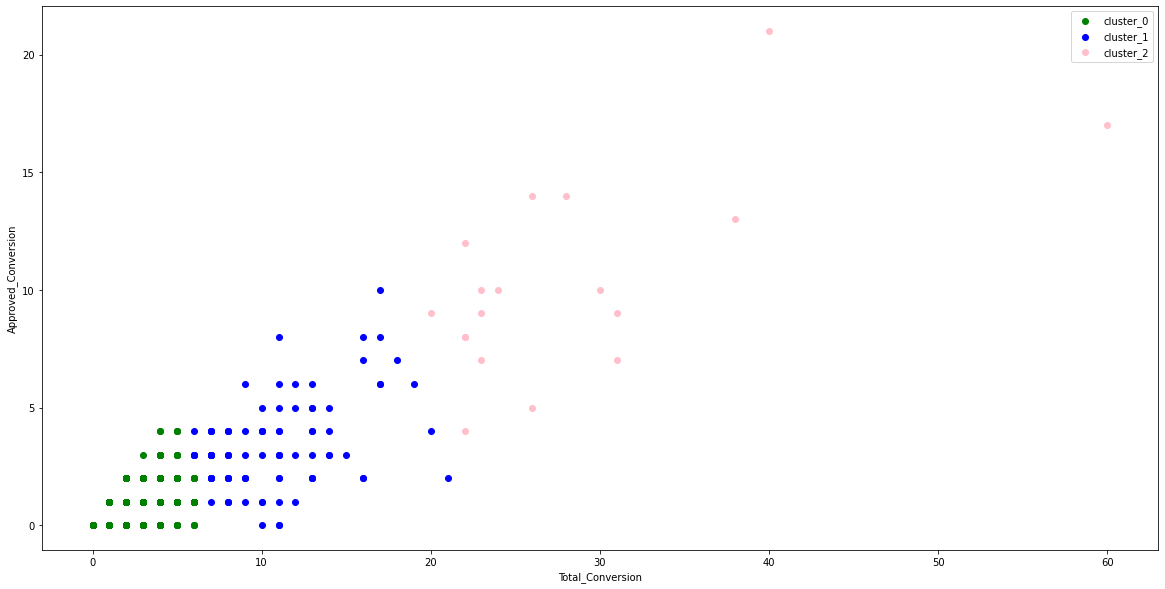

In [78]:
plt.figure(figsize=((20,10)))
plt.scatter (x = x[y_kmeans == 0,0], y = x[y_kmeans == 0,1], c = 'green', label = 'cluster_0' )
plt.scatter (x = x[y_kmeans == 1,0], y = x[y_kmeans == 1,1], c = 'blue', label = 'cluster_1' )
plt.scatter (x = x[y_kmeans == 2,0], y = x[y_kmeans == 2,1], c = 'pink', label = 'cluster_2' )
plt.legend()
plt.xlabel("Total_Conversion")
plt.ylabel("Approved_Conversion")

In [79]:
from sklearn import*
metrics.silhouette_score(x, y_kmeans, metric='euclidean')

0.7864760668656886

Hierarchieal clustering 

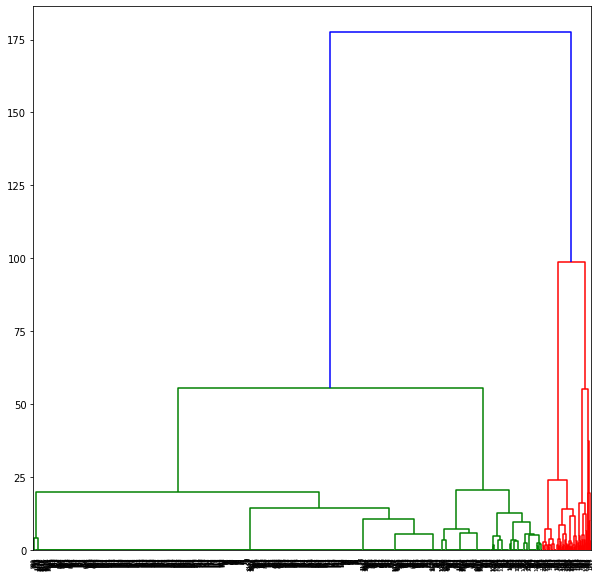

In [52]:
plt.figure ( figsize =((10,10)))
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x,method = 'ward'))


In [83]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters = 3 , affinity = "euclidean")
y_hc = agg.fit_predict(x)

Text(0, 0.5, 'Approved_Conversion')

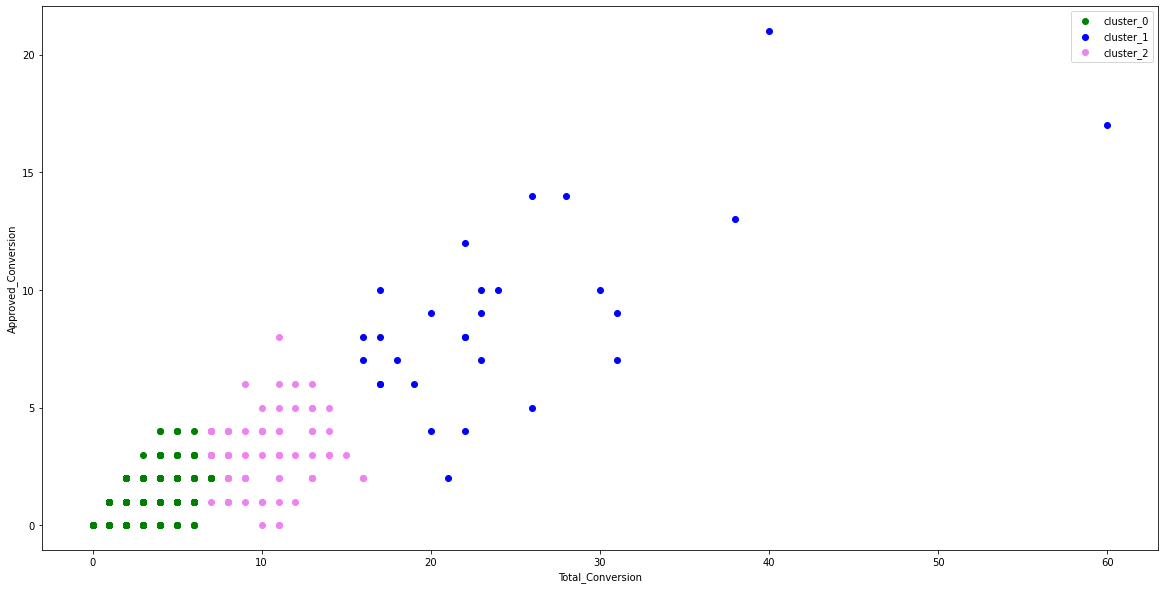

In [ ]:
plt.figure(figsize=((20,10)))
plt.scatter (x = x[y_hc == 0,0], y = x[y_hc == 0,1], c = 'green', label = 'cluster_0')
plt.scatter (x = x[y_hc == 1,0], y = x[y_hc == 1,1], c = 'blue', label = 'cluster_1' )
plt.scatter (x = x[y_hc == 2,0], y = x[y_hc == 2,1], c = 'violet', label = 'cluster_2' )
plt.legend()
plt.xlabel("Total_Conversion")
plt.ylabel("Approved_Conversion")

In [84]:
from sklearn import*
metrics.silhouette_score(x, y_hc, metric='euclidean')

0.7719978615915487

In [86]:
from sklearn.metrics import davies_bouldin_score
metrics.davies_bouldin_score(x, y_hc)

0.5798437824029792

DBScan Clustering

In [6]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

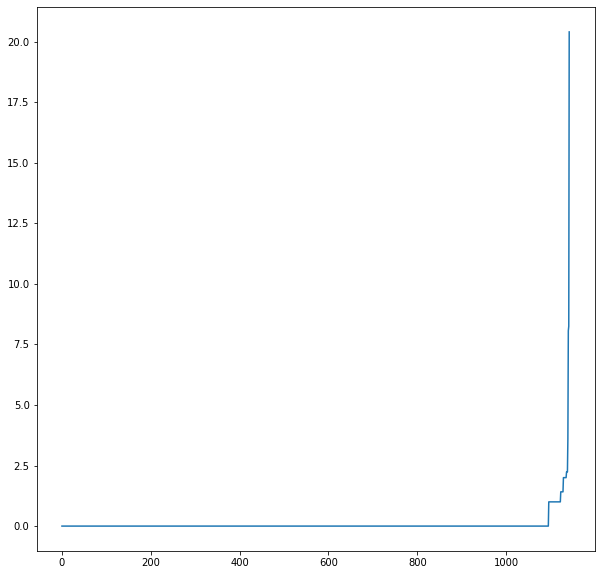

In [7]:
plt.figure(figsize = (10,10))
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)


In [20]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples = 5 )
clusters = dbscan.fit_predict(X_scaled)

In [21]:
clusters

array([0, 1, 1, ..., 1, 3, 3])

Text(0, 0.5, 'Approved_Conversion')

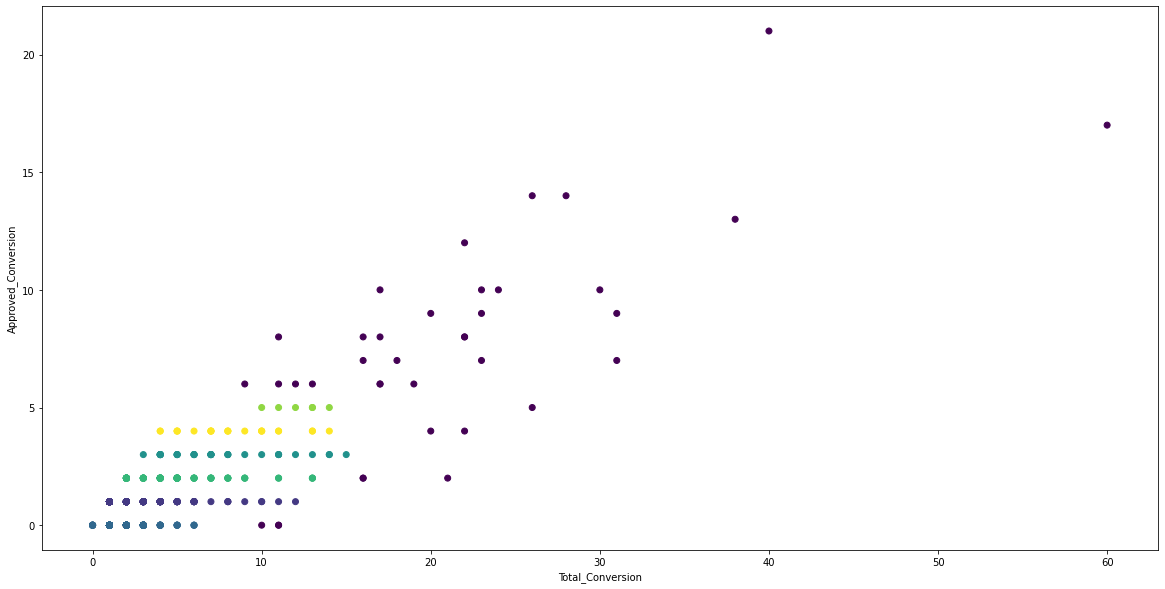

In [33]:
plt.figure(figsize=((20,10)))
plt.scatter(x[:, 0], x[:, 1] ,c = clusters)

plt.xlabel("Total_Conversion")
plt.ylabel("Approved_Conversion")

In [85]:
from sklearn.metrics import davies_bouldin_score
metrics.davies_bouldin_score(x, clusters)

0.6600060729205508

from the above models we final came to know that hierarchical model is the best suite model for our problem statment 

Text(0.5, 1.0, 'hierarchical clustering')

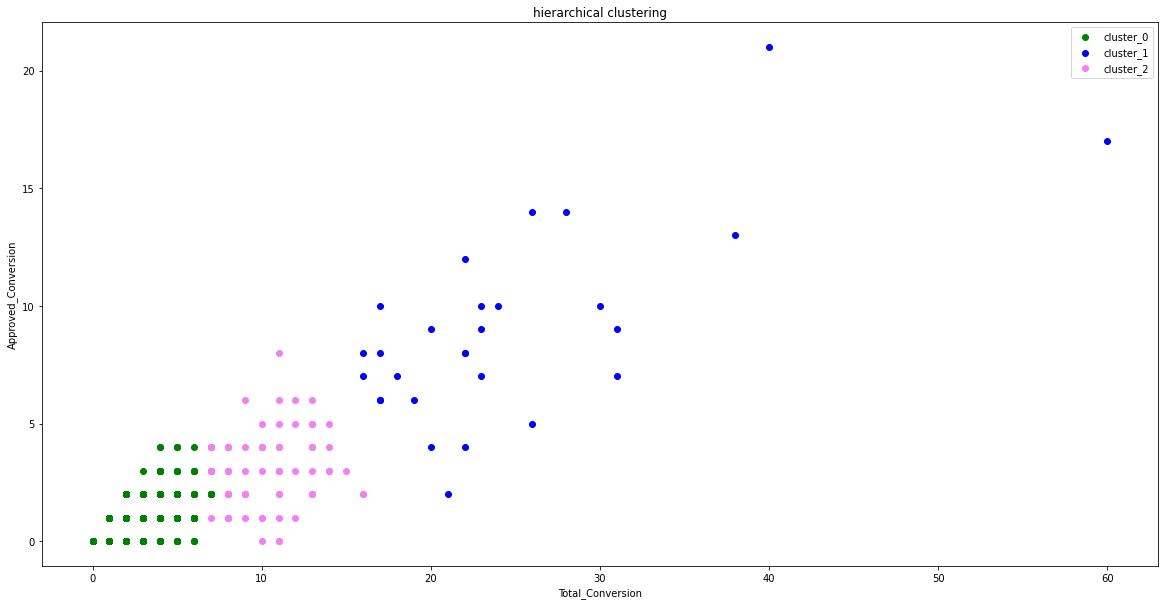

In [93]:
plt.figure(figsize=((20,10)))
plt.scatter (x = x[y_hc == 0,0], y = x[y_hc == 0,1], c = 'green', label = 'cluster_0')
plt.scatter (x = x[y_hc == 1,0], y = x[y_hc == 1,1], c = 'blue', label = 'cluster_1' )
plt.scatter (x = x[y_hc == 2,0], y = x[y_hc == 2,1], c = 'violet', label = 'cluster_2' )
plt.legend()
plt.xlabel("Total_Conversion")
plt.ylabel("Approved_Conversion")
plt.title("hierarchical clustering")

In [97]:
cluster_1 = data[y_hc == 0]
cluster_1.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [99]:
cluster_2 = data[y_hc == 1]
cluster_2.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
518,1121091,1178,144531,30-34,M,10,1194718,141,254.049996,28,14
524,1121098,1178,144532,30-34,M,15,1267550,123,236.769999,24,10
525,1121100,1178,144532,30-34,M,15,3052003,340,639.949998,60,17
528,1121104,1178,144533,30-34,M,16,2080666,202,360.150002,40,21
531,1121108,1178,144533,30-34,M,16,984521,95,163.899997,26,14


In [100]:
cluster_3 = data[y_hc == 2]
cluster_3.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
519,1121092,1178,144531,30-34,M,10,637648,67,122.400000,13,5
522,1121096,1178,144531,30-34,M,10,750060,86,161.909999,11,2
527,1121102,1178,144532,30-34,M,15,357856,30,52.970000,7,3
534,1121113,1178,144534,30-34,M,18,894911,120,215.839999,7,4
537,1121116,1178,144535,30-34,M,19,572450,89,157.329998,7,4




---



---



In [42]:
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [55]:
data.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


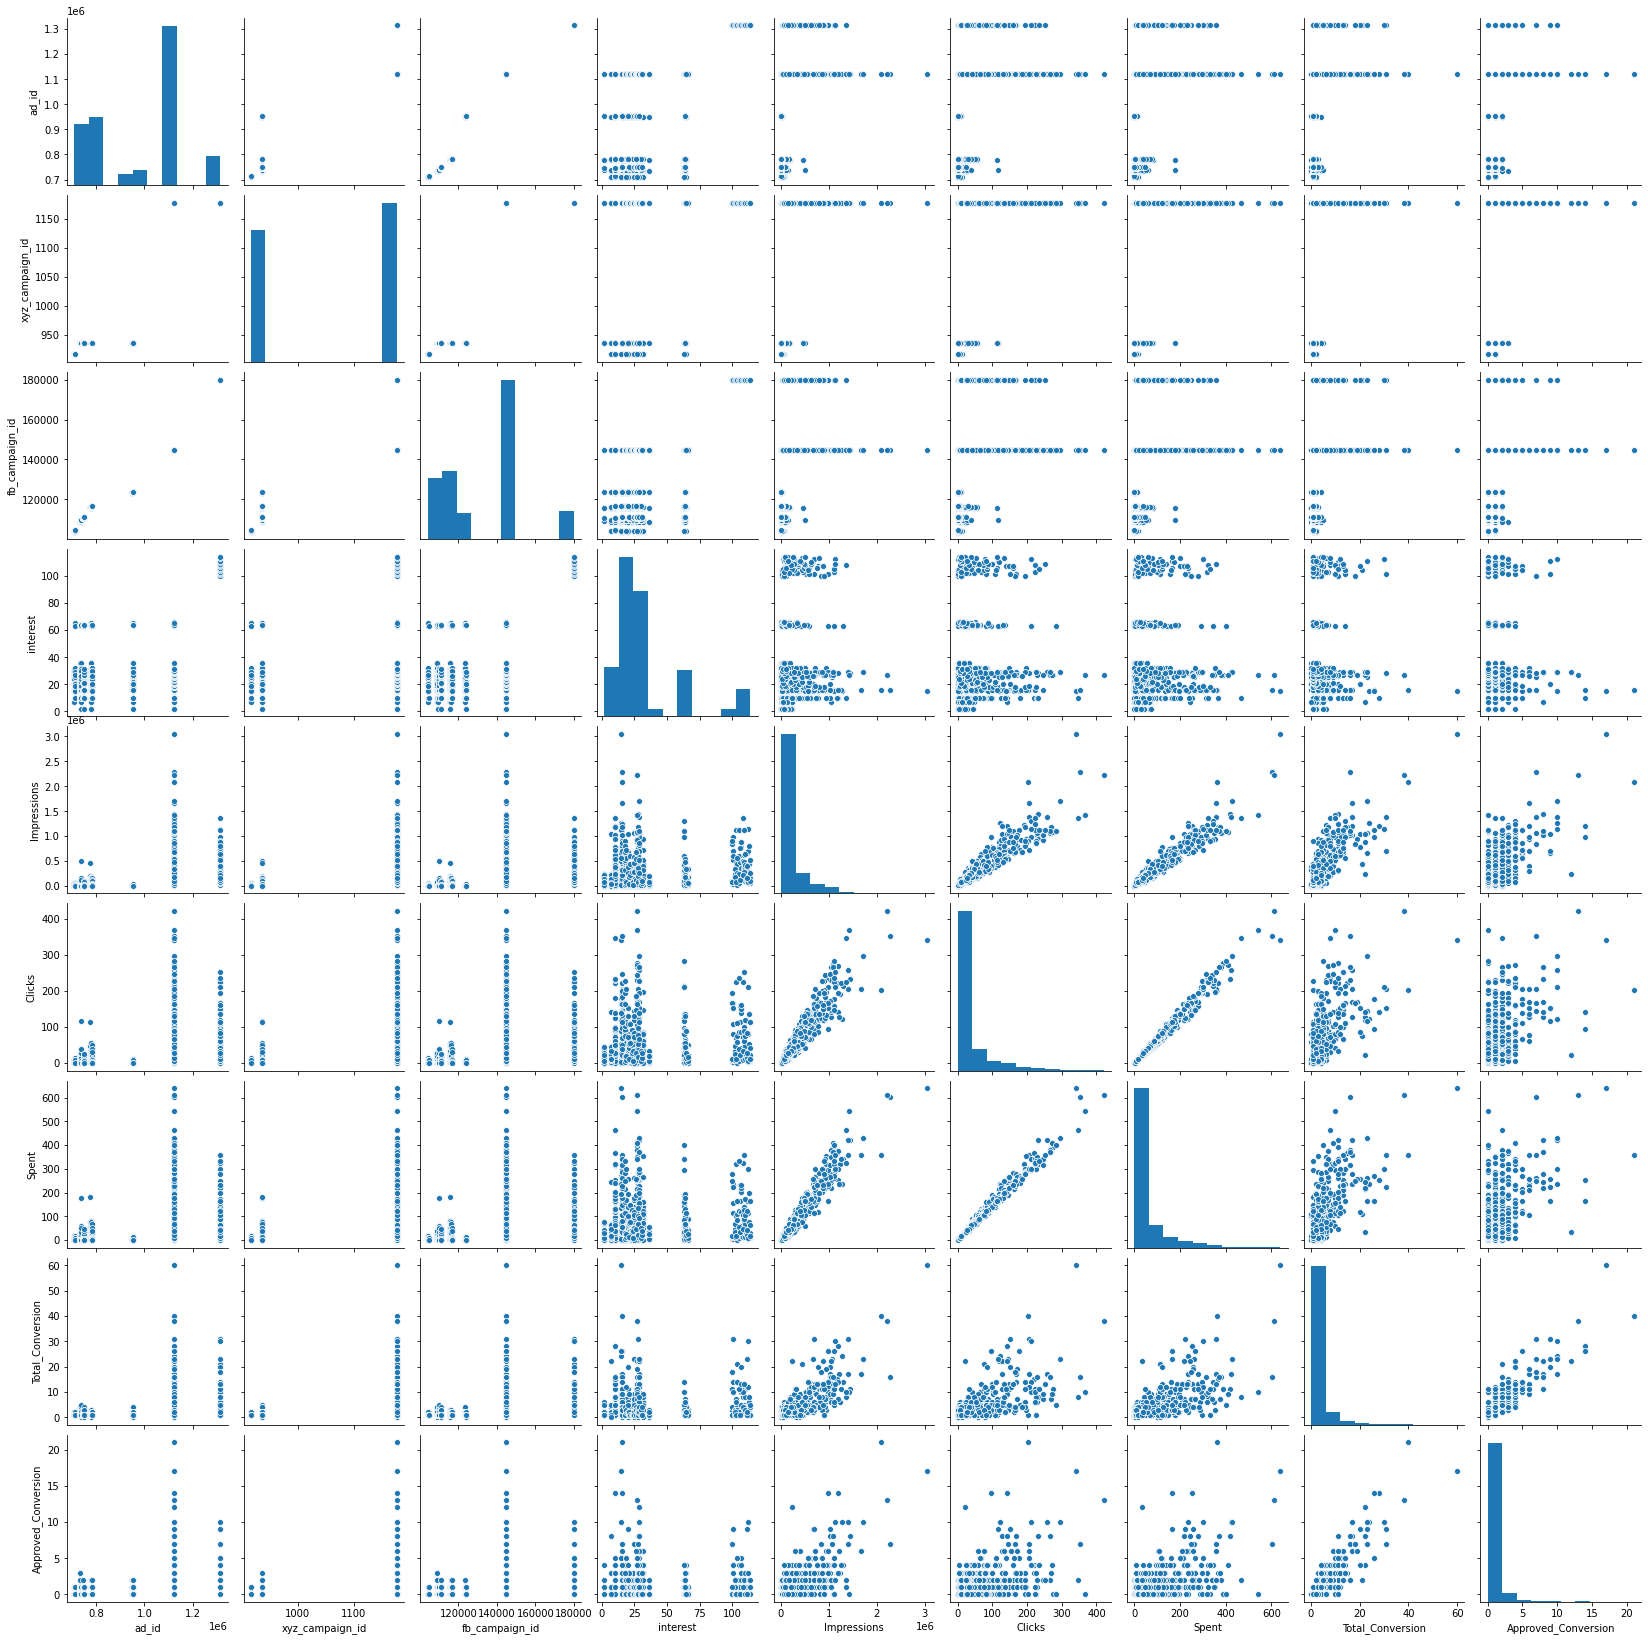

In [57]:
sns.pairplot(data =data)

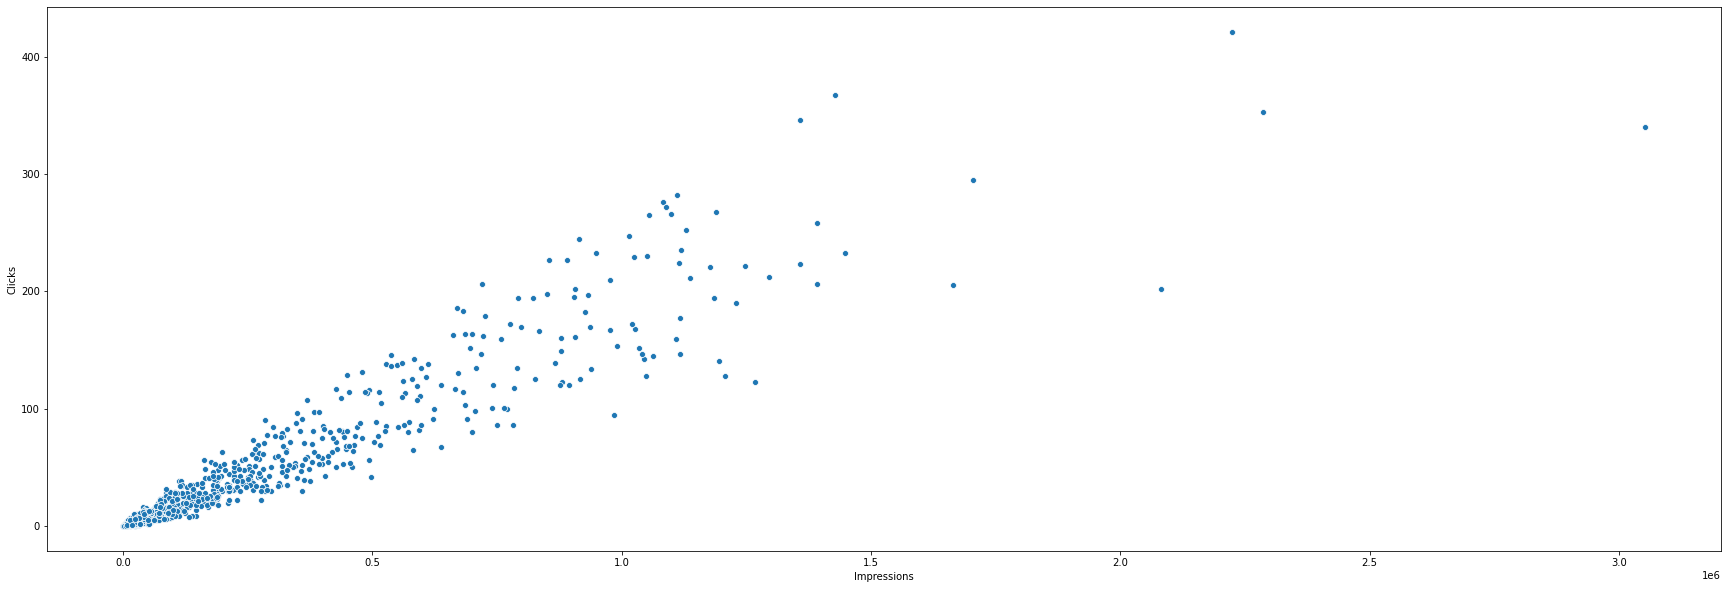

In [58]:
plt.figure(figsize = ((30,10)))
sns.scatterplot(y = "Clicks", x = "Impressions" , data = data )

In [59]:
xx = data[["Clicks","Impressions"]].values
xx

array([[     1,   7350],
       [     2,  17861],
       [     0,    693],
       ...,
       [    28, 151531],
       [   135, 790253],
       [   114, 513161]])

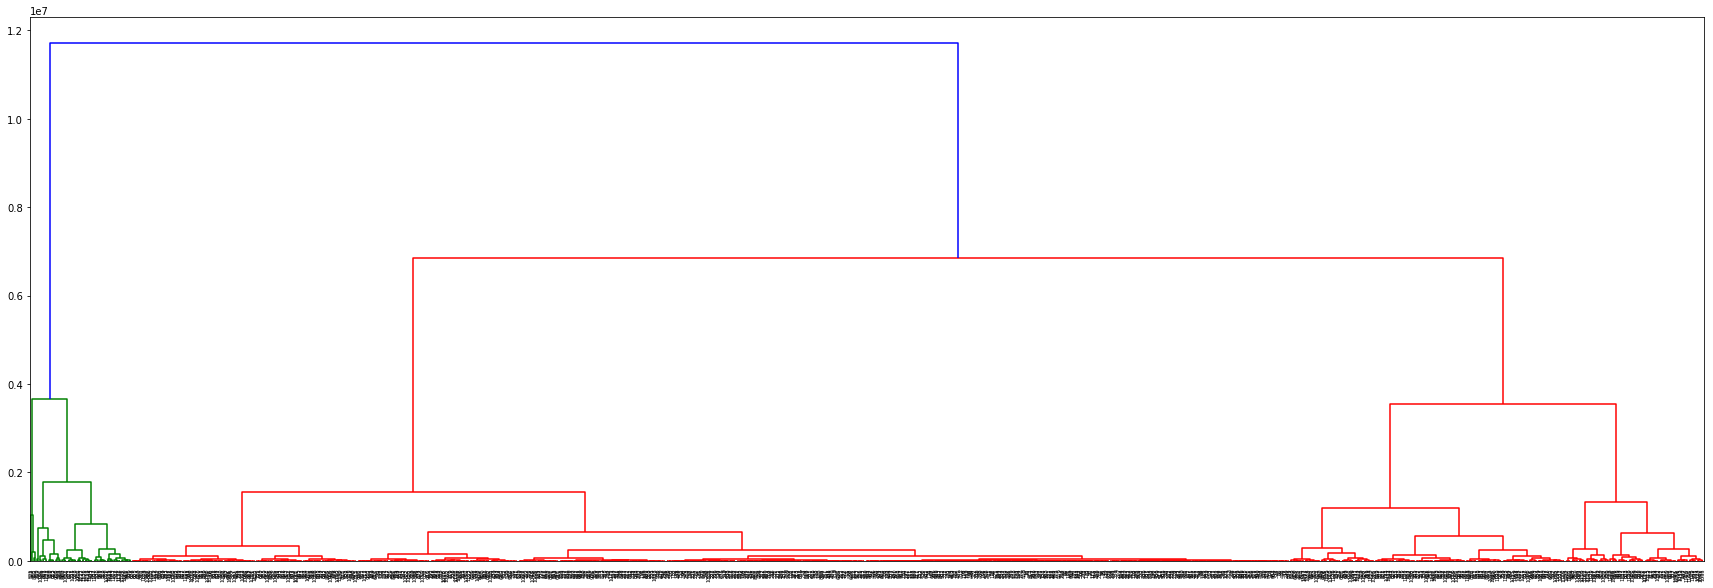

In [60]:
plt.figure ( figsize =((30,10)))
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(xx,method = 'ward'))


In [61]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters = 3 , affinity = "euclidean")
y_hc_xx = agg.fit_predict(xx)

Text(0, 0.5, 'Clicks')

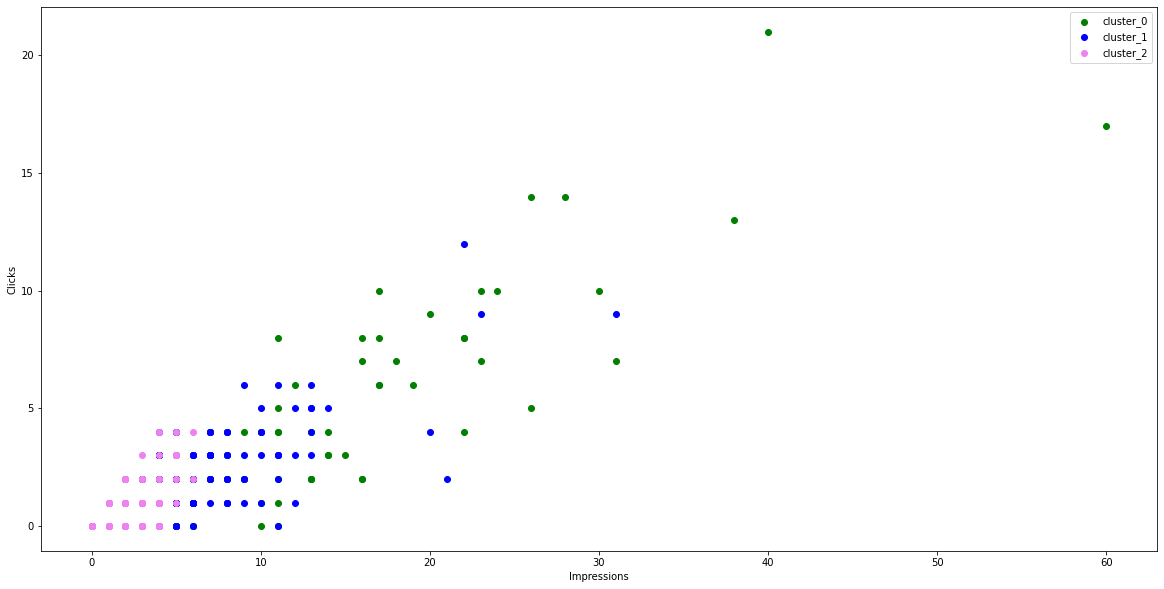

In [62]:
plt.figure(figsize=((20,10)))
plt.scatter (x = x[y_hc_xx == 0,0], y = x[y_hc_xx == 0,1], c = 'green', label = 'cluster_0')
plt.scatter (x = x[y_hc_xx == 1,0], y = x[y_hc_xx == 1,1], c = 'blue', label = 'cluster_1' )
plt.scatter (x = x[y_hc_xx == 2,0], y = x[y_hc_xx == 2,1], c = 'violet', label = 'cluster_2' )
plt.legend()
plt.xlabel("Impressions")
plt.ylabel("Clicks")

In [63]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i , init = "k-means++" , max_iter = 300, n_init = 10 )
    kmeans.fit(xx)
    wcss.append(kmeans.inertia_)
    # inertia bcoz of wcss 

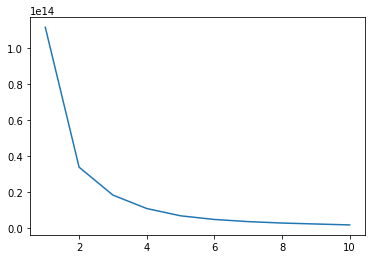

In [64]:
plt.plot(range(1,11),wcss)

In [65]:
kmeans = KMeans(n_clusters = 3)
y_kmeans_xx = kmeans.fit_predict(xx)

Text(0, 0.5, 'Clicks')

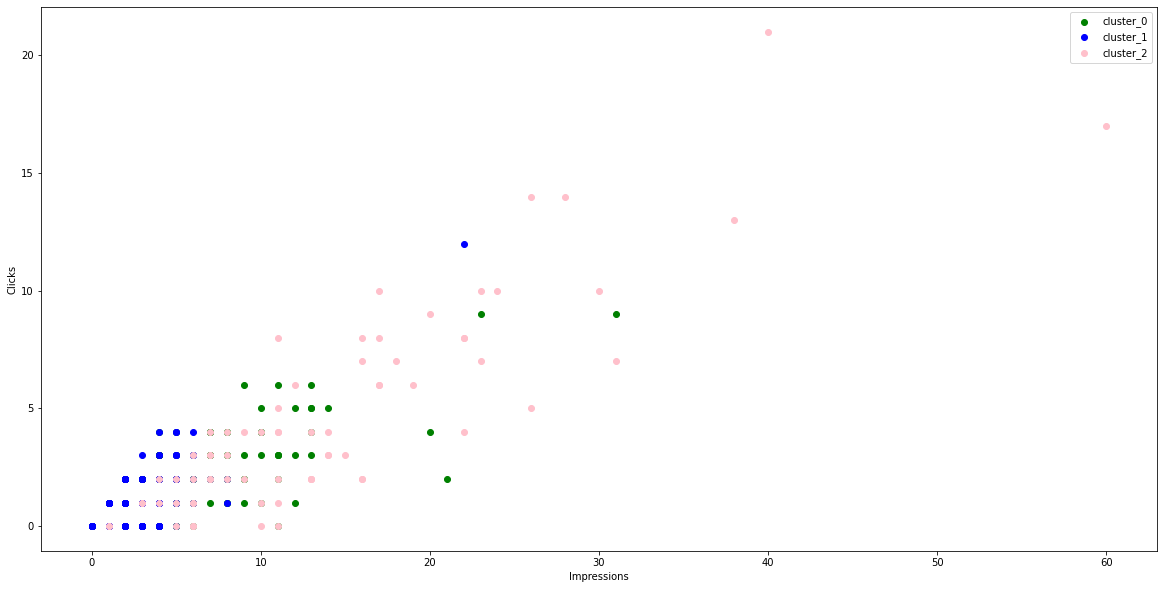

In [66]:
plt.figure(figsize=((20,10)))
plt.scatter (x = x[y_kmeans_xx == 0,0], y = x[y_kmeans_xx == 0,1], c = 'green', label = 'cluster_0' )
plt.scatter (x = x[y_kmeans_xx == 1,0], y = x[y_kmeans_xx == 1,1], c = 'blue', label = 'cluster_1' )
plt.scatter (x = x[y_kmeans_xx == 2,0], y = x[y_kmeans_xx == 2,1], c = 'pink', label = 'cluster_2' )
plt.legend()
plt.xlabel("Impressions")
plt.ylabel("Clicks")

In [67]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(xx)
distances, indices = nbrs.kneighbors(xx)

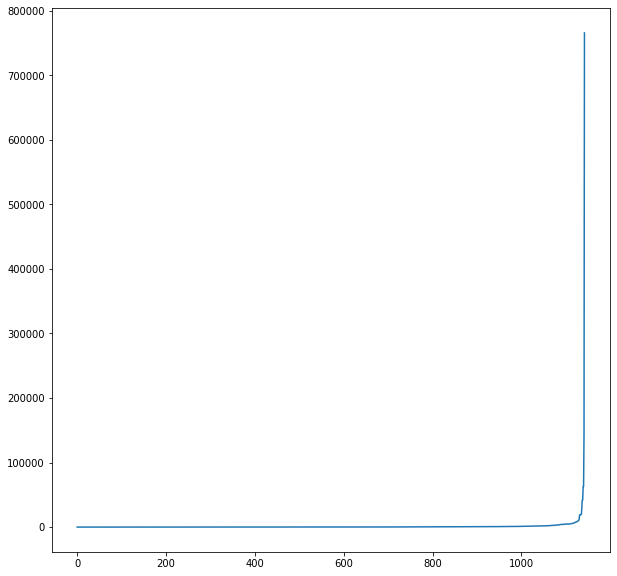

In [68]:
plt.figure(figsize = (10,10))
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_xx = scaler.fit_transform(xx)


from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples = 5 )
clusters = dbscan.fit_predict(X_scaled_xx)

Text(0, 0.5, 'Clicks')

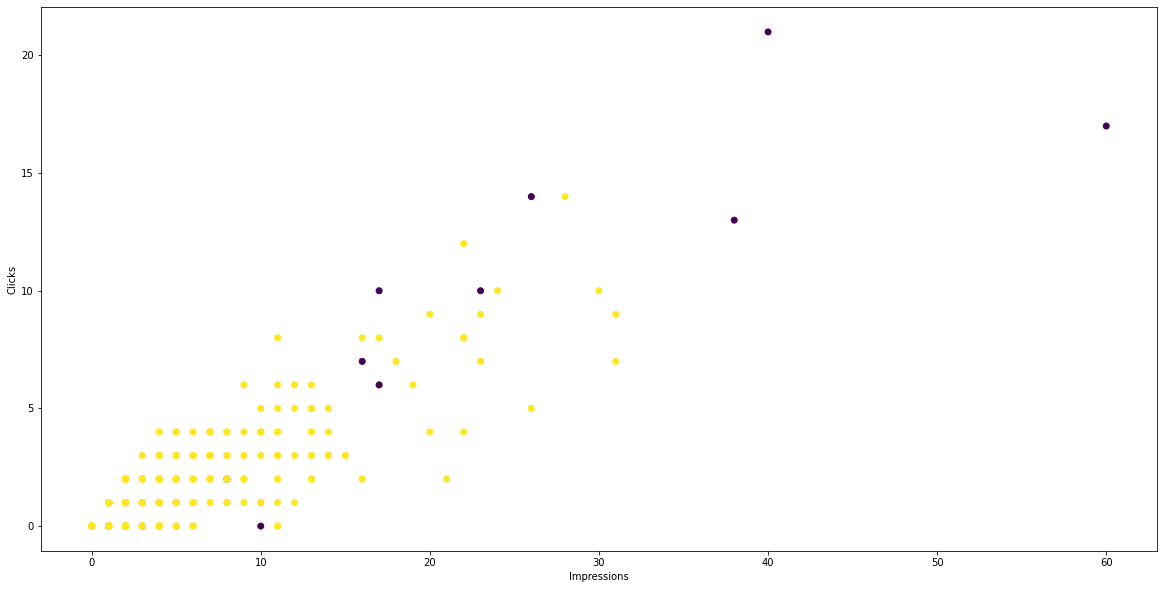

In [70]:
plt.figure(figsize=((20,10)))
plt.scatter(x[:, 0], x[:, 1] ,c = clusters)
plt.xlabel("Impressions")
plt.ylabel("Clicks")